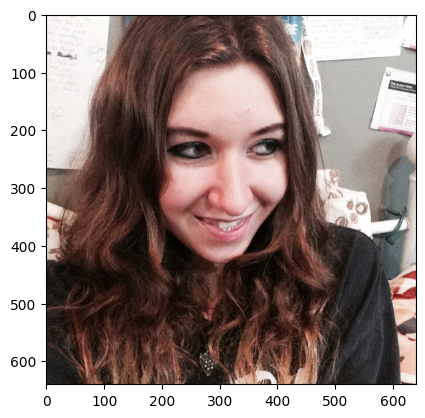

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/IMG_6195.JPG',1)


def rgb_to_hsv(rgb):
    height = rgb.shape[0]
    w = rgb.shape[1]
    hsv = np.zeros((height,w,3),dtype=np.uint8) #create hsv array structure
    
    for y in range(0,height): #looping through all pixels
        for x in range(0,w):
            
            r = rgb[y,x,0]/255
            g= rgb[y,x,1]/255 #converting to num between 0-1
            b = rgb[y,x,2]/255

                    
            v = max(r,g,b)#get the max from the three values which is assigned to v
            vmin = min(r,g,b)#get the min from the three values
            diff=(v-vmin)
            
            if(v> 0.0):
                s = diff/v #calculate s
            else: 
                s= 0.0
            

            if(r==g and g==b): #if all values are equal then h is 0
                h=0
            elif(r==v): #if red is the max value 
                h=60*(g-b)/diff
            elif(g==v): #if green is the max value
                h=120+60*(b-r)
            elif(b==v): #if blue is the max value
                h=240+60*(r-g)/diff

            ns = np.interp(s,[0,1],[0,255]) #convert s and v to openCV
            nv = np.interp(v,[0,1],[0,255])

            
            hsv[y,x]=[round(h/2),round(ns),round(nv)] #add pixels to hsv array no need to add to 3rd placement since its not changing

            

    return hsv  


def bgr_to_rgb(bgr):
    height = bgr.shape[0]
    w = bgr.shape[1]
    rgb = np.zeros((height,w,3), dtype=np.uint8)

    for y in range(0,height):
        for x in range(0,w):
           
            rgb[y,x,0]=bgr[y,x,2]
            rgb[y,x,2]=bgr[y,x,0]
            rgb[y,x,1]= bgr[y,x,1]


    return rgb

img = bgr_to_rgb(img)

plt.imshow(img)




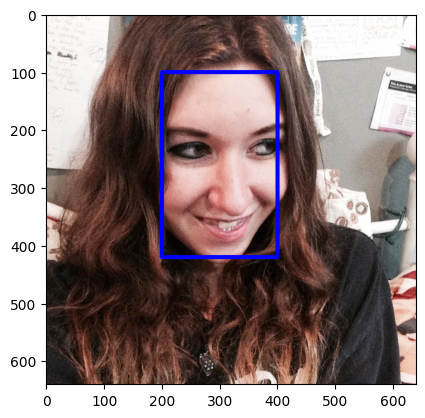

In [3]:


img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
top_left = (400, 100)
bottom_right = (200, 420)
thickness = 6
rect_color = (255, 0, 0)
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)
plt.imshow(img_rect)


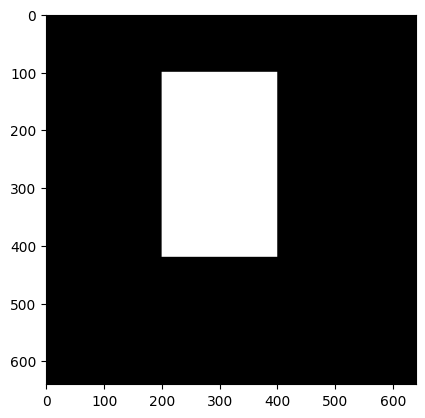

In [4]:
mask = np.zeros(img.shape[:2], np.uint8)
# Add the white portion of the mask.
mask[100:420, 200:400] = 255
# Plot mask.
plt.imshow(mask, cmap="gray")

C:\Users\laure\AppData\Local\Temp\ipykernel_19232\2541770153.py:44: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -10 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  hsv[y,x]=[round(h/2),round(ns),round(nv)] #add pixels to hsv array no need to add to 3rd placement since its not changing
C:\Users\laure\AppData\Local\Temp\ipykernel_19232\2541770153.py:44: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  hsv[y,x]=[round(h/2),round(ns),round(nv)] #add pixels to hsv array no need to add to 3rd placement since its not changing
C:\Users\laure\AppData\Local\Temp\ipykernel_19232\25417

<function matplotlib.pyplot.show(close=None, block=None)>

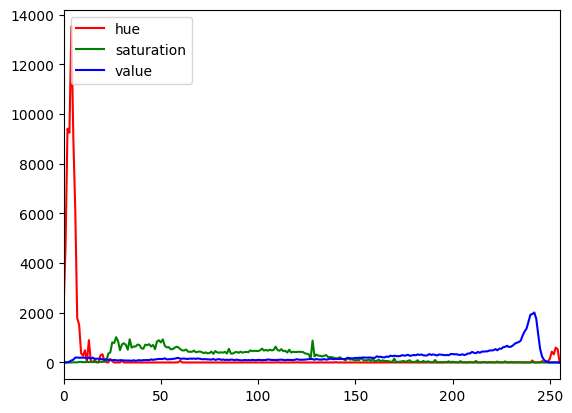

In [5]:
img = cv2.imread('images/IMG_6195.JPG')

img = bgr_to_rgb(img)

img = rgb_to_hsv(img)

hist = cv2.calcHist([img], [0], mask, [256], [0,255])
plt.plot(hist, color='red')
plt.xlim([0,255])

hist = cv2.calcHist([img], [1], mask, [256], [0,255])
plt.plot(hist, color='green')
plt.xlim([0,255])

hist = cv2.calcHist([img], [2], mask, [256], [0,255])
plt.plot(hist, color='blue')
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show

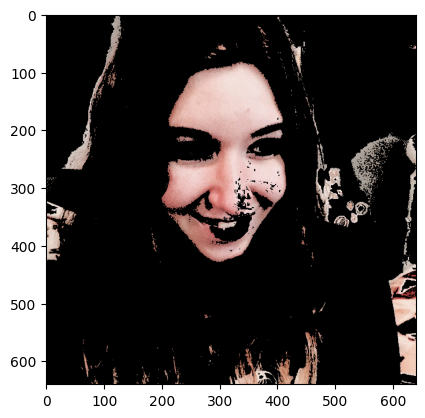

In [6]:


min_HSV = np.array([0,20,160], np.uint8)
max_HSV = np.array([50,180,255],np.uint8)

skinArea = cv2.inRange(img, min_HSV, max_HSV)#error here

#bitwise returns a 1 or 0 based off the mask to decide where to mask and where not to
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

plt.imshow(skinHSV)